In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# # convert from .xlsx to .csv
# df = pd.read_excel("../data/raw/online+retail/Online Retail.xlsx")
# df.to_csv('../data/raw/online+retail/online_retail.csv', index=False)

# Variable Identification

In [3]:
df = pd.read_csv('../data/raw/online+retail/online_retail.csv')
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


None

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


1. `InvoiceNo`: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
2. `StockCode`: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
3. `Description`: Product (item) name. Nominal.
4. `Quantity`: The quantities of each product (item) per transaction. Numeric.	
5. `InvoiceDate`: Invice Date and time. Numeric, the day and time when each transaction was generated.
6. `UnitPrice`: Unit price. Numeric, Product price per unit in sterling.
7. `CustomerID`: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
8. `Country`: Country name. Nominal, the name of the country where each customer resides. 

# Data Cleaning
1. Finding missing values and deal with it
2. Finding duplicates
3. Finding Consistencies of Values in Each Column
4. Fix incorrect data type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# 

In [5]:
# find nan values
display(df.isna().sum().sort_values())

InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
Description      1454
CustomerID     135080
dtype: int64

In [6]:
df[df['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


Seing some of the Rows that contain NA CustomerID values has some of the Description column to be NA as well. Let's check it out if the NA in Description corresponds with the NA in the CustomerID

In [7]:
df['Description'].isna().sum() == df[df['CustomerID'].isna()]['Description'].isna().sum()

True

It's proven NA in the Descriptions column correspond with the NA in the CustomerID column.

In [8]:
# for this we will take just drop rows that contain NA CustomerID
df.dropna(inplace=True)
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## Finding Duplicates

In [11]:
df.duplicated().sum()

5225

There are 5.225 duplicated values

In [14]:
# drop duplicated values
df.drop_duplicates(keep='first', inplace=True)

## Fix incorrect data type

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [38]:
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  object        
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.6+ MB


## Check Consistencies of Values in each Column

In [43]:
# check format in StockCode
def check_format(s):
    """
    Return the number of numbers, letters, spaces, others
    """
    numbers = sum([c.isdigit() for c in s])
    letters = sum([c.isalpha() for c in s])
    spaces = sum([c == ' ' for c in s])
    others = len(s) - numbers - letters - spaces
    return numbers, letters, spaces, others

print("(numbers, characters, spaces, other)")
df['StockCodeFormat'] = df['StockCode'].apply(check_format)
df['StockCodeFormat'].value_counts()

(numbers, characters, spaces, other)


StockCodeFormat
(5, 0, 0, 0)     366179
(5, 1, 0, 0)      33214
(0, 4, 0, 0)       1216
(0, 1, 0, 0)        537
(5, 2, 0, 0)        296
(1, 1, 0, 0)        134
(0, 3, 0, 0)         16
(0, 11, 1, 0)        12
Name: count, dtype: int64

In [47]:
# 12 StockCode entry has space in its value. let's check it out
df[df['StockCodeFormat']==(0, 11, 1, 0)]['StockCode']

# There's nothing odd with it, letjust let it be

4406      BANK CHARGES
62508     BANK CHARGES
152966    BANK CHARGES
175275    BANK CHARGES
327921    BANK CHARGES
361740    BANK CHARGES
361741    BANK CHARGES
407618    BANK CHARGES
431351    BANK CHARGES
440745    BANK CHARGES
506357    BANK CHARGES
534008    BANK CHARGES
Name: StockCode, dtype: object

In [48]:
df['CustomerIDFormat'] = df['CustomerID'].apply(check_format)
df['CustomerIDFormat'].value_counts()

# CustomerID column has consistent format

CustomerIDFormat
(5, 0, 0, 0)    401604
Name: count, dtype: int64

In [66]:
# check if the stockcode is used more than once for different description or other wise
temp = df.copy()[['StockCode', 'Description']]
temp = temp.drop_duplicates()
temp[temp.duplicated(['StockCode'], keep=False)].sort_values(by='StockCode')

,StockCode,Description
47284,16156L,"WRAP, CAROUSEL"
138080,16156L,WRAP CAROUSEL
315743,17107D,FLOWER FAIRY 5 DRAWER LINERS
347764,17107D,FLOWER FAIRY 5 SUMMER DRAW LINERS
6467,17107D,"FLOWER FAIRY,5 SUMMER B'DRAW LINERS"
...,...,...
37284,90014A,SILVER/MOP ORBIT NECKLACE
28450,90014B,GOLD M PEARL ORBIT NECKLACE
386649,90014B,GOLD M.O.P. ORBIT NECKLACE
504721,90014C,SILVER AND BLACK ORBIT NECKLACE


In [68]:
temp = df.copy()[['Description', 'StockCode']]
temp = temp.drop_duplicates()
temp[temp.duplicated(['Description'], keep=False)].sort_values(by='Description')

,Description,StockCode
741,COLOURING PENCILS BROWN TUBE,10133
3330,COLOURING PENCILS BROWN TUBE,10135
3951,COLUMBIAN CANDLE RECTANGLE,72133
12120,COLUMBIAN CANDLE RECTANGLE,72131
7070,COLUMBIAN CANDLE ROUND,72130
7071,COLUMBIAN CANDLE ROUND,72128
75983,EAU DE NILE JEWELLED PHOTOFRAME,85024B
37504,EAU DE NILE JEWELLED PHOTOFRAME,85023B
170525,FRENCH FLORAL CUSHION COVER,20840
93898,FRENCH FLORAL CUSHION COVER,20837


# Univariate Analysis
1. Measure Central Tendency
2. Measure Dispersion for continuous variable only
3. Outlier Identification for continuous variable only
4. Categorical Variable Countplot

In [19]:
# Measure of central tendency and dispersion
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Because an existence of `outliers` we will be using median as the measure of cental tendency
1. The center of data for Quantity is 3
2. The center of data for Price is 2.08

The standard deviation are quite high because of an existence of outliers

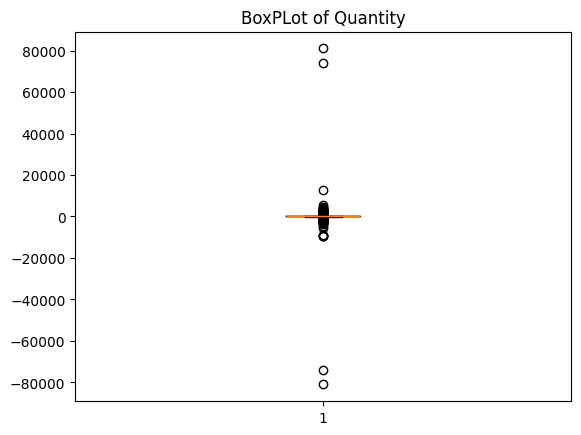

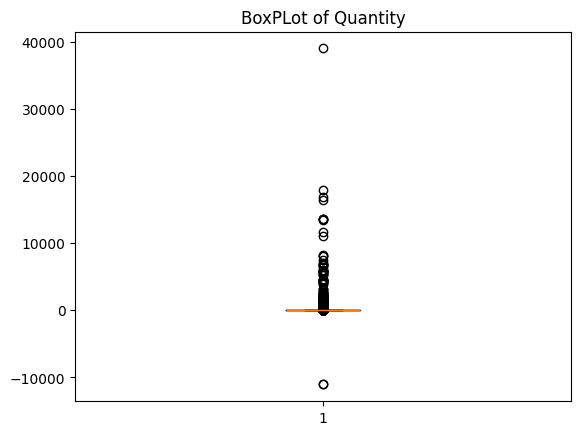

In [22]:
# Visualize Box Plot 
plt.boxplot(df["Quantity"])
plt.title("BoxPLot of Quantity")
plt.show()

plt.boxplot(df["UnitPrice"])
plt.title("BoxPLot of Quantity")
plt.show()

Clear Indication of an Outlier, we will inspect it out. For detecting an outlier, it depends on the distribution of the data. Is it skewed? or is it normally distributed?. We don't know. Steps on identifying outliers:
1. Apply Standardization Method using Z-score to see the distribution of the data itself.
2. Is the data normally distributed? if yes, then use standard deviation to find an outlier. If the data is skewed? use Inter Quartile Range method to detect it. Other type of distribution? use percentile instead.

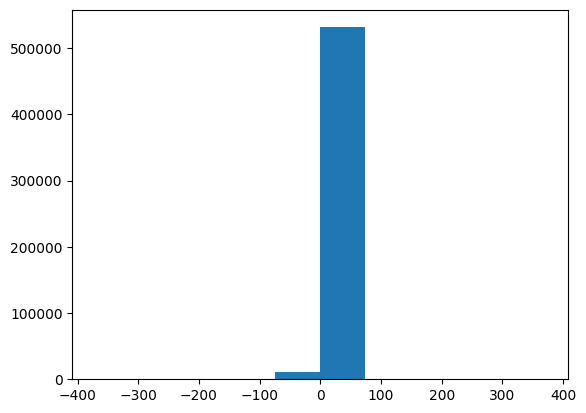

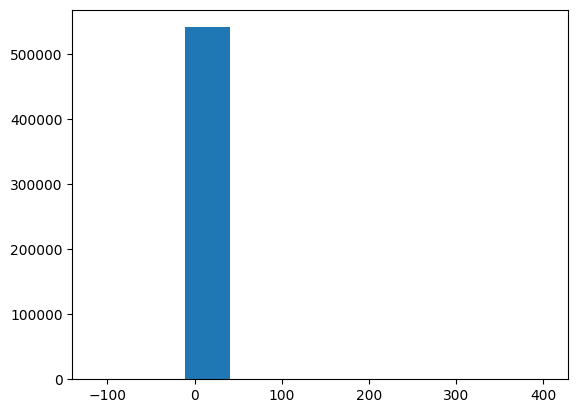

In [26]:
# remove row of quantity that has more than 
temp_df = df.copy()
for f in ['Quantity', 'UnitPrice']:
    temp_df['z_score'] = (temp_df[f] - temp_df[f].mean()) / temp_df[f].std()
    plt.hist(temp_df['z_score'])
    plt.show(f"Standardize {f}")
    plt.show() 

# it's hard to identify if its normally distributed, skewed, etc.

In [25]:
# check skewed values
for f in ['Quantity', 'UnitPrice']:
    print(f'{f} skewness = {df[f].skew()}')

Quantity skewness = -0.2640763070668848
UnitPrice skewness = 186.50697172054137


From the skewness value we can safely say that the `Quantity` is approximately **normally distributed** while the `UnitPrice` is **right skewed**.

In [69]:
# outlier detection Quantity
# calculate mean and standard deviation
q1, q3 = df['Quantity'].quantile([0.25, 0.75])
iqr = q3 - q1

# calculate upper bound and lower bound
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

filtered_df = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

In [70]:
# outlier detection UnitPrice
# calculate Q1 and Q3
q1, q3 = df['UnitPrice'].quantile([0.25, 0.75])
iqr = q3 - q1

# calculate upper bound and lower bound
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

filtered_df = filtered_df[(filtered_df['UnitPrice'] >= lower_bound) & (filtered_df['UnitPrice'] <= upper_bound)]

In [71]:
filtered_df.describe()

,Quantity,UnitPrice,CustomerID
count,444108.000000,444108.000000,327498.000000
mean,4.803066,2.694544,15345.003670
std,4.616762,1.930320,1704.517156
min,-12.000000,0.000000,12347.000000
25%,1.000000,1.250000,14041.000000
50%,3.000000,2.080000,15287.000000
75%,8.000000,3.750000,16843.000000
max,23.000000,8.330000,18287.000000


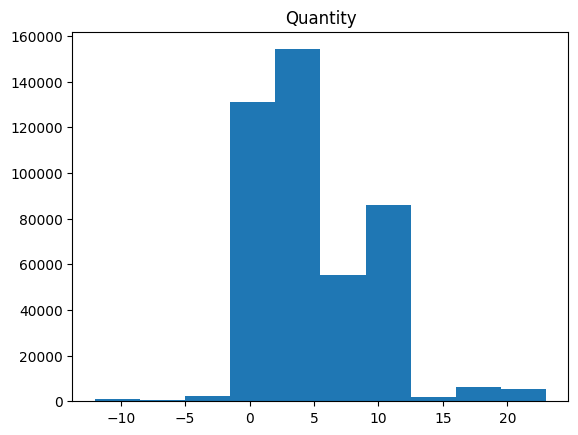

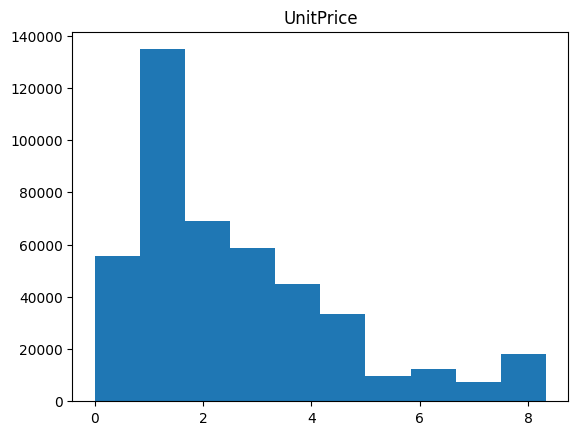

In [73]:
# remove row of quantity that has more than 
for f in ['Quantity', 'UnitPrice']:
    plt.hist(filtered_df[f])
    plt.title(f)
    plt.show() 

# it's hard to identify if its normally distributed, skewed, etc.

In [61]:
# unique categorical values
for f in ['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country']:
    print(f'{f} unique values = {filtered_df[f].nunique()}')

InvoiceNo unique values = 25900
StockCode unique values = 4070
Description unique values = 4223
InvoiceDate unique values = 23260
Country unique values = 38


There are 25,900 transactions based on `InvoiceNo`, There are approximately 4,070 products being sold based on `Description`.

In [55]:
df['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


High transactions happened in The United Kingdom

# Questions to Answer?
1. How was the store sales globally?
2. How was the store sales in each country?
3. What is top 5 popular products globally?
4. What is top 5 popular products in each country?


In [16]:
df = pd.read_excel("../data/raw/online+retail+ii/online_retail_II.xlsx")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [13]:
# store sales globally
print("store global sales", df['Price'].sum())

store global sales 2463799.654


In [23]:
# store sales by country
# print("store global sales", df['Price'].sum())
filtered_df = df[['Price', 'Country']]
filtered_df = filtered_df.groupby(by=['Country'])['Price'].sum().sort_values(ascending=False)
filtered_df[:5]

Country
United Kingdom    2207453.813
EIRE                76858.260
Norway              34600.850
Germany             29898.451
France              24181.320
Name: Price, dtype: float64